In [27]:
import numpy as np
import pandas as pd
import chardet
import os
import csv
import matplotlib.pyplot as plt

In [28]:
f='APCspend2013.csv'
os.rename('WELLCOME_APCspend2013_forThinkful.csv', f)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'WELLCOME_APCspend2013_forThinkful.csv' -> 'APCspend2013.csv'

In [85]:
# Random Function Online to Fix UTF Decoding Problem

path =  f
newpath = path+'edited'

with open(path, 'r', encoding='utf-8', errors='ignore') as infile, open(path + 'edited', 'w') as outfile:
     inputs = csv.reader(infile)
     output = csv.writer(outfile)

     for index, row in enumerate(inputs):
         # Create file with no header
         if index == 0:
             continue
         output.writerow(row)

UnicodeEncodeError: 'charmap' codec can't encode character '\u2212' in position 114: character maps to <undefined>

In [86]:
# Random Function #2 Online to fix UTF Decoding Problem

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc
 
 
my_encoding = find_encoding(newpath)
df = pd.read_csv(newpath, encoding=my_encoding)

In [87]:
# Rename Columns

df.columns = ['PMID', 'Publisher','Journal','Article','Cost']

In [88]:
# Turn Cost into Numeric with Apply Function

df['Cost'] = df['Cost'].apply(pd.to_numeric, errors='coerce')

In [89]:
# Create New Notes Column

df["CleanNotes"]=None

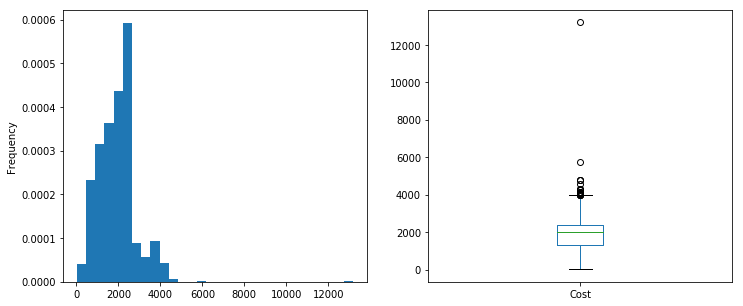

In [121]:
# Look at Distribution for issues - Histogram and Boxplot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
df["Cost"].plot(kind='hist',bins=30,ax=axes[0],density=True)
df["Cost"].plot(kind='box',ax=axes[1])

In [91]:
# Make Notes of Changes to Rows with Cost of 99999, then change these to None

df.loc[df.Cost==999999, 'CleanNotes'] = "Cost erroneously entered as 999999.  Reset to None"
df.loc[df.Cost==999999, 'Cost'] = None

In [92]:
# Check for Article Duplicates

sum(df.duplicated("Article"))

0

In [93]:
df.Journal=df.Journal.astype(str)

In [94]:
df.Journal=df.Journal.str.title()

In [95]:
df.Journal=df.Journal.str.strip()

In [105]:
len(df.Journal.unique())

557

In [104]:
from Levenshtein import jaro

cleancolumn=df["Journal"]

for i, coll1 in enumerate(cleancolumn):
    for j in range(i + 1, len(cleancolumn)):
        coll2 = cleancolumn[j]
        if len(coll2) - len(coll1) > 15:
            break
        if coll2==coll1:
            break
        similarity = jaro(coll1,coll2)
        if similarity >= 0.90 and similarity != 1.0:
            print ("Similarity Score: "+str(round(similarity,2))+" "+"("+cleancolumn[i]+")"+" or "+"("+cleancolumn[j]+")"+str(i)+" "+str(j))
            cleancolumn[j]=cleancolumn[i]
        

Similarity Score: 0.96 (American Journal Of Psychiatry) or (Americal Journal Of Psychiatry)42 43
Similarity Score: 0.99 (Antimicrobial Agents And Chemotherapy) or (Antimicrobial Agfents And Chemotherapy)83 84
Similarity Score: 0.99 (Antimicrobial Agents And Chemotherapy) or (Antimicrobial Agents And Chemotherapy)84 166
Similarity Score: 0.99 (Journal Of Clinical Microbiology) or (Jounral Of Clinical Microbiology)97 110
Similarity Score: 0.92 (Biological Chemistry) or (Biologicial Chemistry)114 115


C:\Users\colea\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Similarity Score: 0.9 (Journal Of Biological Chemistry) or (Journal Biological Chemistry)151 161
Similarity Score: 0.9 (Journal Of Biological Chemistry) or (Journal Of Biological Chemistry)161 162
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc Public Health)176 193
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc Public Health)176 194
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc Public Health)176 195
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc  Public Health)193 194
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc  Public Health)193 195
Similarity Score: 0.91 (Bmc  Public Health) or (Bmc  Public Health)194 195
Similarity Score: 0.98 (International Journal Of Behavioral Nutrition And Physical Activity) or (International Journal Of Behavioural Nutrition And Physical Activity)206 207
Similarity Score: 0.93 (Molecular Brain) or (Molecular Pain)216 217
Similarity Score: 0.97 (Bmc Genomics) or (Bmc Genomics.)225 226
Similarity Score: 0.98 (British Journal Of Ophthal

Similarity Score: 0.91 (Health & Place) or (Health And Place)582 583
Similarity Score: 0.94 (International Journal Of Cardiology) or (International Journal Of Parasitology)596 597
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy And Clinical Immunology)605 606
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy And Clinical Immunology)605 607
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy And Clinical Immunology)605 608
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy & Clinical Immunology)606 607
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy & Clinical Immunology)606 608
Similarity Score: 0.9 (Journal Of Allergy & Clinical Immunology) or (Journal Of Allergy & Clinical Immunology)607 608
Similarity Score: 0.99 (Journal Of Behavior Therapy And Experimental Psychiatry) or (Journal Of Behaviour 

Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1242
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1243
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1244
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1245
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1246
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1247
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1248
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1249
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1250
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1251
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)1239 1252
Similarity Score: 0.95 (Nucleic Acid Research) or (Nucleic Acids Research)12

In [106]:
# Group By Journals and Aggregate with Count

df.groupby("Journal").count().sort_values("Article", ascending=False)["Article"].head()

Journal
Journal Of Biological Chemistry                    54
Neuroimage                                         31
Human Molecular Genetics                           20
Proceedings Of The National Academy Of Sciences    19
Nature Communications                              19
Name: Article, dtype: int64

In [107]:
# Get Name of Journals of Interest for Stats

Journals=list(df.groupby("Journal").count().sort_values("Article", ascending=False)["Article"].head().index)

In [108]:
# Create Stat Tables

mymean=round(df.groupby("Journal").mean().loc[Journals,:],0)
mystd=round(df.groupby("Journal").std().loc[Journals,:],0)
mymedian=round(df.groupby("Journal").median().loc[Journals,:],0)
mycount=round(df.groupby("Journal").count().loc[Journals,:],0)["Article"]

In [109]:
# Concatenate Stats Table

Stats=pd.concat([mymean,mystd,mymedian,mycount],axis=1)

# Rename Columns

Stats.columns=["Mean","STD","Median","Article Count"]

In [110]:
Stats

,Mean,STD,Median,Article Count
Journal,,,,
Journal Of Biological Chemistry,1414.0,413.0,1288.0,54
Neuroimage,2212.0,273.0,2326.0,31
Human Molecular Genetics,2023.0,119.0,2040.0,20
Proceedings Of The National Academy Of Sciences,831.0,479.0,752.0,19
Nature Communications,3134.0,869.0,3642.0,19


# Spell Cheker which doesn't Help

from textblob import TextBlob

df.Journal[1:10].apply(lambda txt: ''.join(TextBlob(txt).correct()))